# Clustering

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import AA_utils 
from sklearn.metrics import  silhouette_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [63]:
datadir = '/home/sebacastillo/PycharmProjects/research_tools/data/'

# K-means

Algoritmo de clusterizacion basado en la determinación de *k* centros. El método genera agrupamientos en los datos minimizando las distancias entre los datos y sus centros. Los agrupamientos presuponen similitudes en las observaciones tomando en cuenta sus atributos.

El algoritmo procede:

1. Elije aletoreamente (hay otras opciones) k *centroide*,
2. Computa distancias de las observaciones al centroide, 
3. Compara *error de las distancias* entre diferentes cluster y sus centroides (SSE intracluster, también denominada *la inercia del cluster*), 
4. Ajusta hasta encontrar un punto óptimo.

El modelo computa distancia euclidea por lo que es sensible a la escala de las variables, resulta insoslayable normaliza.

**Objetivo general:**

- Minimizar distancia intra-cluster (ejemplos de un mismo cluster), y

- Maximizar distancia inter-cluster (ejemplos de distintos clusters)

# Evaluación del modelo

Como es un modelo de aprendizaje no supervisado, la evaluación del modelo debe procurar una métrica íntrínseca al desempeño (independiente de los datos). A tal fin se disponde de dos:

1. Punto **elbow** o punto codo: el punto en el cual el aumento de clusters no lleva a un sustancial decremento en la SSE (distorsion o error en el modelo). El punto óptimo no es el mínimo, sino el punto de inflexión donde la variación relativa baja en relación a las variaciones anteriores.   

2. Ìndice silhouette, análisis que permite medir la fuerza del agrupamiento, considerada como la cohesión intracluster y la distancia intercluster. El índice oscila entre el -1 y el 1, siendo el 1 = óptimo.

## K-mean y esperanza de vida
El dataset sobre 'esperanza de vida' de WHO es de alta dimensionalidad (dim>2), por lo tanto no podremos visualizar los clusters

In [74]:
# cargar dataset
dataset= 'who_life_expectancy.csv'
df=pd.read_csv(datadir+dataset)
# transformar a numpy
# data= df.values

# Limpieza
df = df.drop(columns=['Country', 'Year', 'Status', 'Population'])
df = df.dropna()

df.head()


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [113]:
df.shape

(1853, 18)

Los datos no estàn normalizados. Las variables tienen escalas muy distintas.

In [81]:
# Normalizaciòn
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [84]:
df[1:3]

array([[0.35333333, 0.37396122, 0.04      , 0.        , 0.00387755,
        0.6185567 , 0.00374312, 0.22103862, 0.04095238, 0.57291667,
        0.54505495, 0.6185567 , 0.        , 0.00512721, 0.64206642,
        0.61921708, 0.50854701, 0.48309179],
       [0.35333333, 0.36980609, 0.04125   , 0.        , 0.0038615 ,
        0.63917526, 0.00327143, 0.21438083, 0.04238095, 0.61458333,
        0.54139194, 0.63917526, 0.        , 0.00528705, 0.64944649,
        0.62633452, 0.50213675, 0.47826087]])

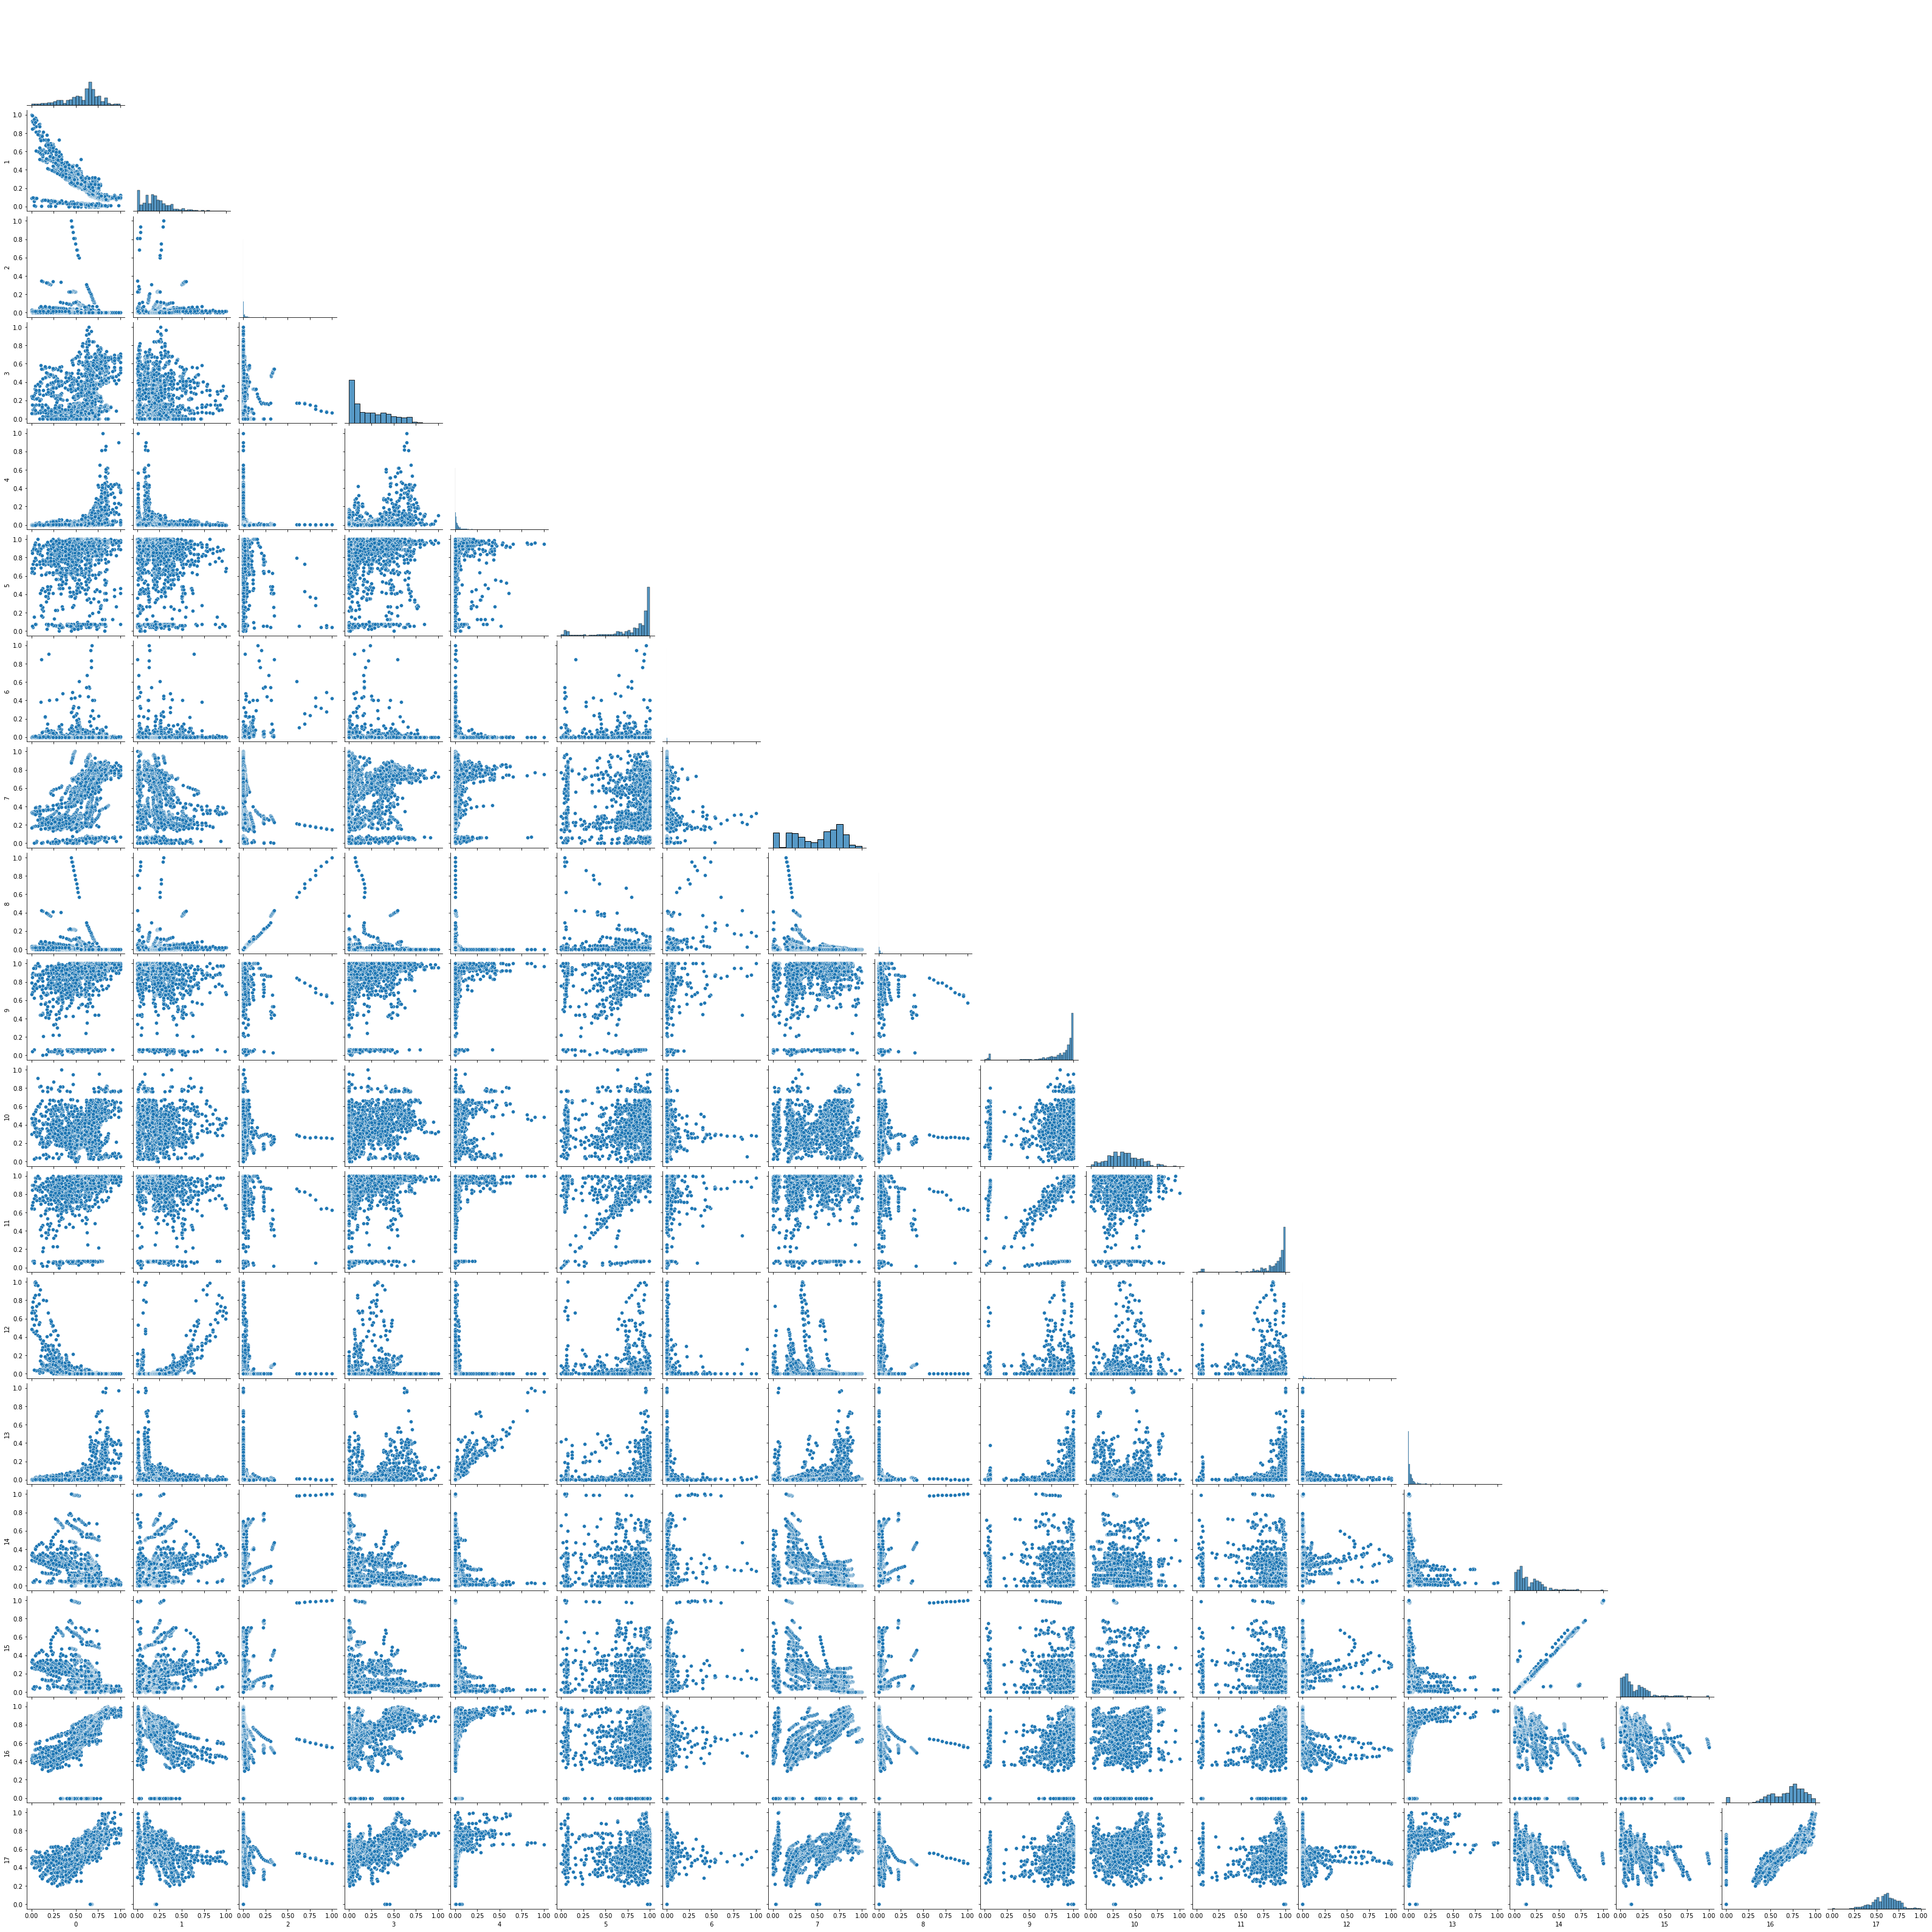

In [77]:
sns.pairplot(pd.DataFrame(df), corner=True);

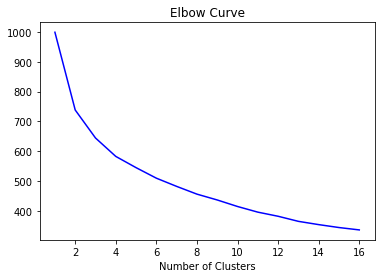

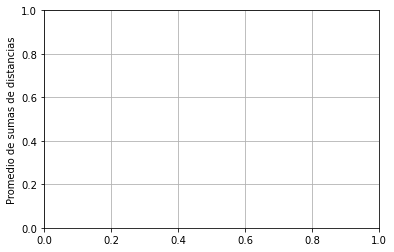

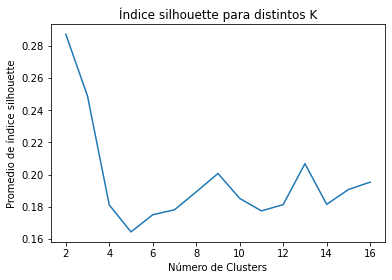

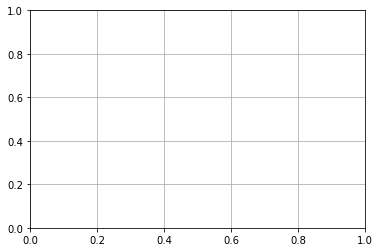

In [78]:
#%% visualizar curva elbow y silhouette
AA_utils.graficar_punto_elbow(df, 16)
AA_utils.graficar_indice_silhouette(df, 16)

K = 2 The average silhouette_score is : 0.2872035760946959


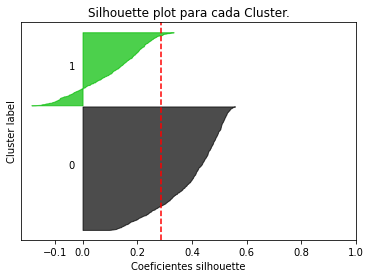

In [79]:
#--------------Entrenar modelo----------
# Parametros ----------------------------
k= 2

kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# clasificar cada patrón con los centroides
kmeans_labels = kmeans.predict(df)

# centroides
centers = kmeans.cluster_centers_

#%% analisis del clustering
silhouette_avg = silhouette_score(df, kmeans_labels)
print("K =", k, "The average silhouette_score is :", silhouette_avg)
AA_utils.graficar_indice_silhouette_k(df, k)

In [85]:
#%% visualizar predicción
#plt.figure()
#data= df.values
#plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, s=50, cmap='viridis')
# visualizar centros
#plt.scatter(centers[:, 0], centers[:, 1],marker='*', c='red',s=600, alpha=0.8)


### Conclusion
Sin normalizar la clasificación k-means ofrece resultados aceptables para un cluster. Aunque tiene una distribución de datos no euclideana. Los centros no son representativos, ni se constatan patrones de agrupamientos útiles.

Con normalizacion los resultados son inaceptables.

# GMM

El modelo de GMM = Gaussian Mixture Models, procede generando cada cluster como una 'gaussiana'. Cada patrón no esta dentro o fuera del cluster, sino que pertenece a uno con cierta probabilidad.

In [117]:
# Imports varios ----------------------------------------
import matplotlib.pyplot as plt
import AA_utils 
from sklearn.mixture import  GaussianMixture
import pandas as pd
plt.close('all')


In [118]:
datadir = '/home/sebacastillo/PycharmProjects/research_tools/data/'

In [119]:
# cargar dataset
dataset= 'who_life_expectancy.csv'
df=pd.read_csv(datadir+dataset)
# transformar a numpy
# data= df.values

# Limpieza
df = df.drop(columns=['Country', 'Year', 'Status', 'Population'])
df = df.dropna()

In [120]:
# Normalizaciòn
scaler = MinMaxScaler()
df = scaler.fit_transform(df)


#%% fit a Gaussian Mixture Model 
k= 7

model = GaussianMixture(n_components=k) # crea el modelo
model.fit(data) # entrena el modelo con EM
scores= model.score_samples(data) # log(verosimilitud) de cada patrón
labels= model.predict(data) # etiqueta de cada dato (clusters)
probs= model.predict_proba(data)
print('Score del modelo: ', model.score(data))


Score del modelo:  34.80192730428773


In [121]:
#AA_utils.graficar_GMM(data, model, labels=False)

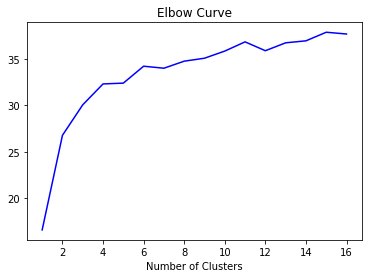

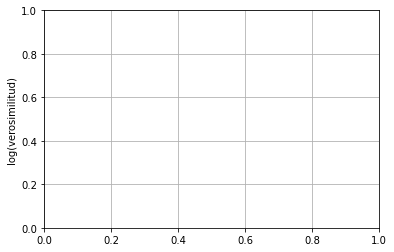

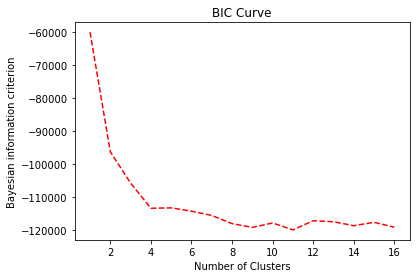

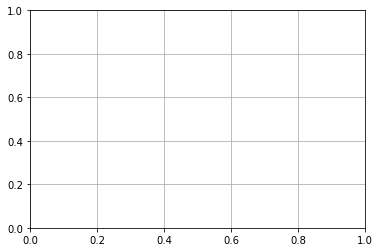

In [122]:
AA_utils.graficar_punto_elbow(data,16, GMM=True)

Bayesian information criterion (BIC) es un criterio para selección de modelos, similar índice silhouette. Cuando más chico mejor.

In [123]:
#%%  visualizar scores
scores= model.score_samples(data)
#scores= np.exp(scores) # Convertir a probabilidades

#  detectar anómalos
u_scores= np.mean(scores)
s_scores= np.std(scores)
linea_de_corte= u_scores - 4*s_scores
anomalos_ind= scores< linea_de_corte
anomalos= data[anomalos_ind]

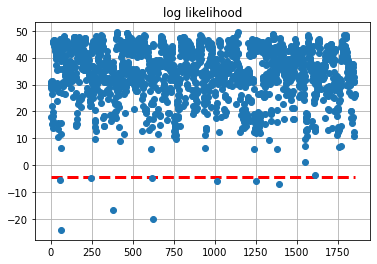

In [110]:

plt.figure()
plt.title('log likelihood')
plt.plot(scores, 'o')
plt.hlines(linea_de_corte, 0, data.shape[0], color='r', linestyle='--', linewidth= 3)
plt.grid();